<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries : New ones are sklearn Preporocessing and mpl_toolkits

In [0]:
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.colors 
from mpl_toolkits import mplot3d
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

#Sigmoid Function with one parameter and plotting. 
New Colab feature of Slider 

$S_{w,b}(x)= \frac{1}{1 + exp^-(w*x+b)}$ 
This is signmoid for single input x 

In [0]:
def sigmoid(w,b,x):
  return 1/(1 + np.exp(-(w*x + b )))

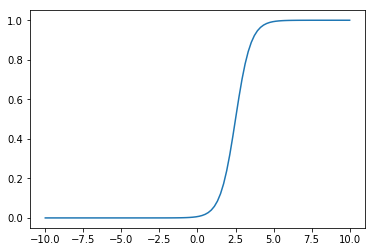

In [92]:
w =2 #@param {type: "slider", min: -2 , max :2 ,step:0.1}
b = -5 #@param {type: "slider", min: -5 , max :5 ,step :0.5}
X = np.linspace(-10,10,100)
Y = sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

Observations : 
Increasing and decreasing the w value has effect on the slope of the curve 
Increasing and decreasing the b value moves the cuve left or right meaning the knee point is moved accordingly.  

#Multiple parameter Signmoid and its visulaization
$S_{w1,w2,b}(x1,x2)= \frac{1}{1 + exp ^ -(w1*x1 + w2*x2 + b)}$ 
This is Sigmoid in more than one input variable 

In [0]:
def sigmoid_2d(w1,w2,x1,x2,b):
  return (1/ (1 + np.exp(-(w1*x1 + w2*x2 +b))))

Plotting 3d sigmoid using matplotlib
New concept of meshgrid to create matrix of poitns.

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
XX1, XX2 = np.meshgrid(X1, X2)
w1 = 0.5 
w2 = 2 
b = 0 
Y = sigmoid_2d(w1,w2,XX1,XX2,b)


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

Surface plaot takes data as 2D arrays. In this case we have X1 and X2 as inputs and Y output for each combination of X1 and X2

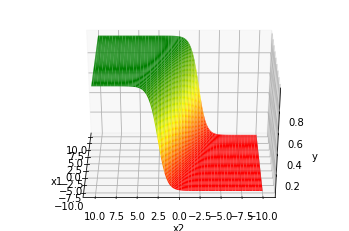

In [96]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y, cmap =my_cmap)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
#view_init is useful to set the elevation and azimuth for the surface graph 
ax.view_init(30,180)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


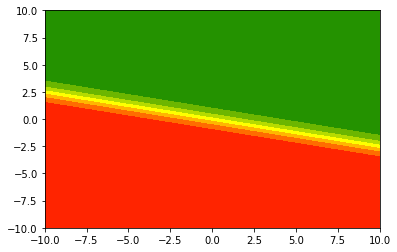

In [97]:
#Contour plots constant Y with respect to X1 and X2. This gives better visulization how ouput is affected with respect to inputs
plt.contourf(XX1,XX2,Y,cmap= my_cmap, aplha = 0.6)
plt.show()

#Calculating the Loss function
step 1 : to create the valid dataset 
step 2 : iterate and calcualte the loss and estiamte the w and b

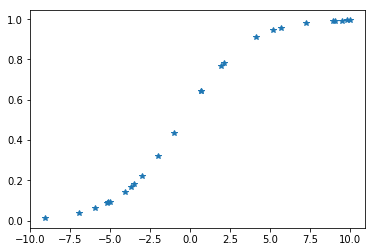

In [98]:
w_unknown = 0.5 
b_unknown = 0.25
X = np.random.random(25)*20-10 #the 20 is for the range of -10 to 10 and subtaction of 10 is to center it to 0
Y = sigmoid(w_unknown, b_unknown, X)
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(w_est,b_est,x))**2
  return loss

we try to find the best estimates of w and b by brute force mechanism
This is not principled way but to understand what does it mean to learn parameters


In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

               
  

Text(0.5, 0, 'Loss')

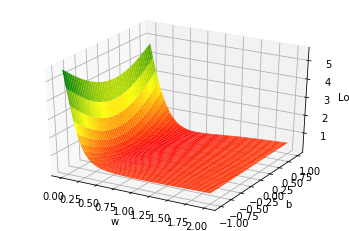

In [101]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss, cmap =my_cmap)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

Find the minimum loss indices and corresponding W and B

In [102]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i,j)
print(WW[i,j])
print(BB[i,j])

62 25
0.5050505050505051
0.2525252525252526


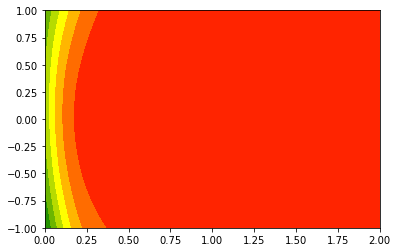

In [103]:
plt.contourf(WW,BB,Loss,cmap =my_cmap)
plt.show()

#Sigmoid Neuron 
Following class is implementation of Sigmoid Neuron with following functions 
perceptron
sigmoid
grad_w : calculating the gradient of w 
grad_b : calculating the gradient of b
fit : fitting model 
predict

In [0]:
class SigmoidNeuron : 
  
  def __init__(self):
    self.w = None 
    self.b = None 
  
  def perceptron ( self, x) :
    return (np.dot(x,self.w.T)+ self.b)
  
  def sigmoid(self,x):
    return (1 / (1  + np.exp(-x)))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred)*x)
  
  def grad_b(self,x,y): 
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred))
  
  def fit(self, X ,Y ,epochs = 1, learning_rate =1 , initialise = True, display_loss = False ): 
      
      if (initialise):
        #initialize the weights 
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0
      
      if display_loss : 
        Loss = {}
        
      for i in tqdm_notebook(range(epochs), total = epochs , unit ='epoch'):
        dw = 0 
        db = 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)
        
        self.w -= learning_rate * dw 
        self.b -= learning_rate * db
        if display_loss : 
          y_pred = self.sigmoid(self.perceptron(X))
          Loss[i] = mean_squared_error(y_pred, Y)
      
      if display_loss: 
        plt.plot(Loss.values())
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show()
        
  def predict(self,X):
    Y_pred = []
    for x in X :
      pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(pred)
    return np.array(Y_pred)
        

Testing withthe Toy data 

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap = my_cmap, alpha =0.6)
  ax.scatter(X[:,0],X[:,1], cmap= my_cmap, c =Y)
  ax.plot()


[[-0.32299547  0.85987491]] [0.00141767]



[[0.02663247 0.72294442]] [0.01575742]



[[0.57639156 0.42318937]] [0.03481836]



[[ 0.72250417 -0.01619314]] [0.06499632]



[[ 0.7554563  -0.42819507]] [0.00885335]



[[ 0.96563792 -0.1690518 ]] [-0.04180577]



[[ 0.96878151 -0.45206886]] [-0.10687306]



[[ 1.11778081 -0.26905089]] [-0.15429223]



[[ 1.12745895 -0.4501009 ]] [-0.208595]



[[ 1.22356955 -0.35637276]] [-0.2483898]



[[ 1.24950285 -0.44087504]] [-0.28983203]



[[ 1.30739456 -0.41853979]] [-0.32353689]



[[ 1.34268866 -0.44820385]] [-0.35622946]



[[ 1.38287002 -0.45423651]] [-0.38549805]



[[ 1.41754823 -0.46750256]] [-0.41292266]


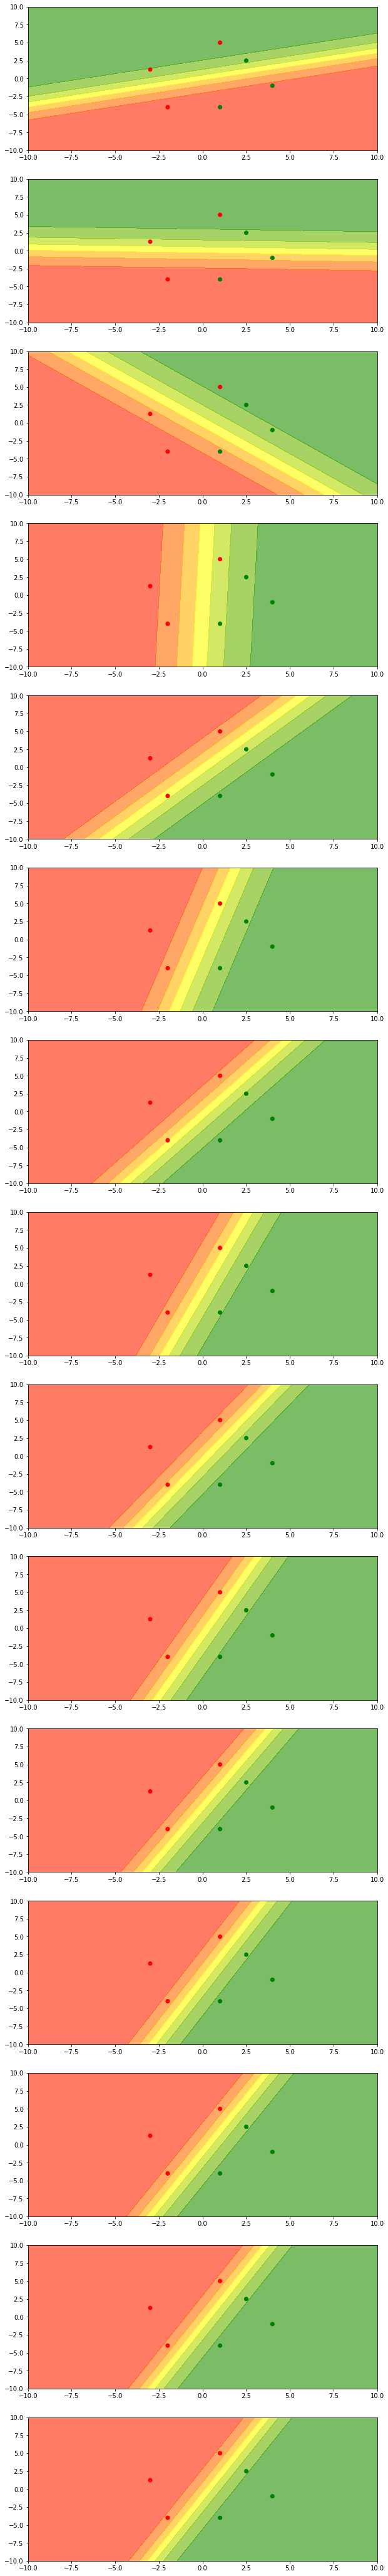

In [106]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.05,True)
N =15
plt.figure(figsize =(10,N*5))

#no initializing the weights 
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1 , i + 1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)

#Load Data Real world problem

In [0]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()
X = data.drop('Rating', axis =1 )
Y = data['Rating']


In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize= True)
Y_binarized = data['Class'].values

#Standardization 
Standardization of a dataset is a common requirement for many machine learning application.
The model might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Hence we need to standardize the features

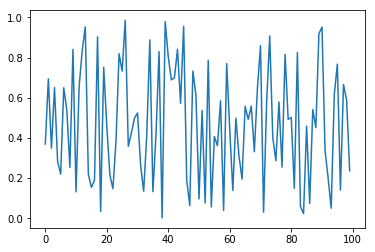

0.4707944239234124
0.28243525826423577


In [109]:
from sklearn.preprocessing import StandardScaler
R = np.random.random([100,1])
plt.plot(R)
plt.show()
print(np.mean(R))
print(np.std(R))

1.4765966227514583e-16
0.9999999999999998


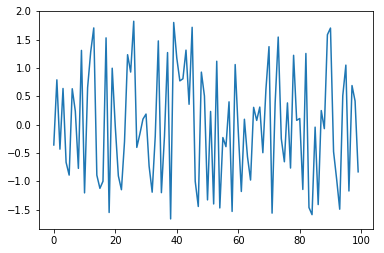

In [110]:
scaler = StandardScaler()
scaler.fit(R)
scaler.mean_
RT = scaler.transform(R)
print(np.mean(RT))
print(np.std(RT))
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify = Y_binarized , random_state = 0)
#we wil fit and transform the train and use the same model to transform the test data set.
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

#we need to scaled the Y between 0 and 1 hence use MInMAxScaler
minmaxScaler = MinMaxScaler()
Y_scaled_train = minmaxScaler.fit_transform(Y_train.values.reshape(-1,1))
Y_scaled_test = minmaxScaler.transform(Y_test.values.reshape(-1,1))

#since everything is scaled the threshold needs to be scaled too
scaled_threshold = list(minmaxScaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

#Now binaried the output to have scaled version of binary classifications
Y_binarized_train = (Y_scaled_train >= scaled_threshold).astype(np.int).ravel()
Y_binarized_test = (Y_scaled_test >= scaled_threshold).astype('int').ravel()

#Train on Real Data 
post standadization now we train the data 

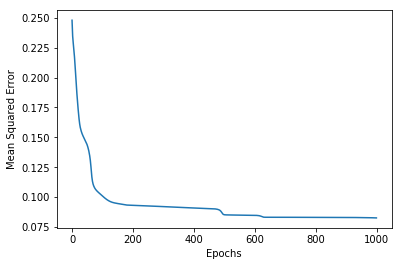

In [114]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs = 1000, learning_rate = 0.015 , display_loss = True )

##Test on train and test data 

In [0]:
y_pred_train = sn.predict(X_scaled_train)
y_pred_test  = sn.predict(X_scaled_test)

#standardized the output to the same level 
y_binarized_pred_train = (y_pred_train >= scaled_threshold).astype(np.int).ravel()
y_binarized_pred_test = (y_pred_test >= scaled_threshold).astype('int').ravel()

In [121]:
print(accuracy_score(y_binarized_pred_train, Y_binarized_train))
print(accuracy_score(y_binarized_pred_test, Y_binarized_test))

0.6823529411764706
0.686046511627907
